# ARIOUI Habiba MINI PROJET 2

## I) Introduction

### I)1. Un exemple de système chaotique

La particularité des systèmes chaotiques est leur sensibilité extrême aux conditions initiales.

On nous explique que le chaos est déterministe et basé sur les équations du mouvement fixes.

Un exemple simple de système chaotique peut être modélisé par l'équation logistique, qui illustre comment une perturbation sur les conditions initiales, aussi faible soit-elle, entraîne des évolutions dans le temps très différentes.

### I)2. Présentation du problème mathématique

Dans ce mini projet, nous décrivons cette dynamique à l'aide de la croissance d'une population de lapins.

Le modèle idéal de leur croisance, est décrit mathématiquement par la suite:

                      np = (alpha**p)n0

avec np le nombre de lapins l'année p, et alpha le nombre de petits par portée (une par an).

Dans la réalité, il faut prendre en compte les prédateurs et les ressources naturelles finies.
Ainsi on écrira:    

                      alpha = r(1 - ni/nmax)


On obtient, en remplaçant alpha par sa valeur non constante, et en divisant par nmax, la suite logistique suivante:

                      x(i+1) = r(1 - xi)xi

Avec xi = ni/nmax, ni le nombre de lapins l'année i, nmax le nombre de lapins l'année i si la croissance était idéale (exponentielle), et r le taux de croissances maximal.

On introduit f, fonction logistique:

                      f(x) = r(1-x)x

Avec r entre 1 et 4.
  


## II) Comportement de la suite:

Dans la cellule suivante, on représente graphiquement le comportement de la suite logistique:



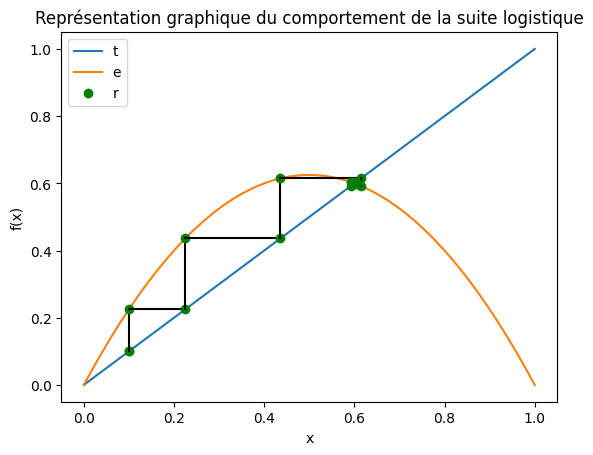

In [2]:
#Import des bibliothèques nécessaires

import numpy as np
import matplotlib.pyplot as plt
import math as mt

# Initialisation de la suite et définition des constantes
X0 = 0.1              #premier terme de la suite
R = 2.5
N = 10                # on calcule et représente les N premiers termes

X_MIN = 0
X_MAX = 1



# Définition des fonctions utiles au tracé graphique
def fonc_logistic(x, r=R):
    return r*(1 - x)*x


def tracer_bissectrice(xmin, xmax):
    ''' trace la droite d'équation x = y '''
    Lx = np.linspace(xmin, xmax)
    plt.plot(Lx, Lx)
    plt.legend('bissectrice')

def tracer_fonc_logistic(xmin, xmax):
    ''' trace seulement la fonction '''
    Lx = np.linspace(xmin, xmax)
    Ly = [ fonc_logistic(x) for x in Lx ]
    plt.plot(Lx, Ly)
    plt.legend('fonction logistique')

def termes_suite_logistic(x0, n, r=R):
    ''' renvoie la lsite des n premiers termes de la suite '''
    Liste_termes = [ x0 ]
    for i in range(n):
        next_terme = fonc_logistic(Liste_termes[i], r)
        Liste_termes.append(next_terme)
    return Liste_termes


def tracer_recurrence(liste_termes):
    ''' trace la récurrence comme dans le cours représentation graphique d'une suite '''
    lt = liste_termes
    plt.plot(lt[0], lt[0], 'og')
    plt.legend('termes de la suite')
    plt.title('Représentation graphique du comportement de la suite logistique')
    for i in range(len(lt)-1):
        plt.plot(lt[i], lt[i], 'og')
        plt.plot([lt[i], lt[i]], [lt[i], lt[i+1]], 'k')
        plt.plot(lt[i], lt[i+1], 'og')
        plt.plot([lt[i], lt[i+1]], [lt[i+1], lt[i+1]], 'k')


# Appel des fonctions pour les différents tracés
tracer_bissectrice(X_MIN, X_MAX)
tracer_fonc_logistic(X_MIN, X_MAX)
lts = termes_suite_logistic(X0, N, R)
tracer_recurrence(lts)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


Pour différentes valeurs de R, la suite converge ou diverge. Pour R = 2.5, la suite converge vers une imilte finie.

## II) Diagramme de bifurcation



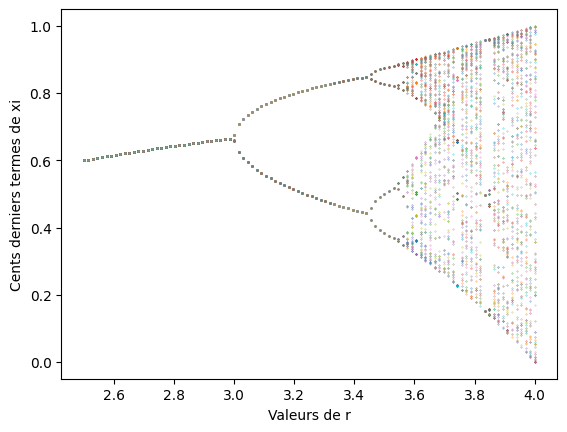

In [4]:
# Définitions des constantes pour le diagramme de bifurcation

N_bifurcation = 1000
XO = bifurcation = 0.01
R = 2.5


#Définition des fonctions pour tracer le diagramme de bifurcation

def cent_derniers_termes(x0, n=N_bifurcation, r=R ):
    ''' renvoie les cents derniers termes des milles premiers termes de la suite'''
    lts = termes_suite_logistic(x0, n, r)
    return lts[901:]

def tracer_limite_pour_R(cent_termes, R):
    ''' trace les cents derniers termes pour un R donné'''
    for ct in cent_termes:
        plt.plot(R, ct, '.', ms=0.5)

def tracer_limites_pour_les_R(liste_R, x0, n=N_bifurcation):
    '''trace le diagramme de bifurcation, ie les 100 derniers termes pour plusieurs R '''
    for r in liste_R:
        cent_termes = cent_derniers_termes(x0, n, r)
        tracer_limite_pour_R(cent_termes, r)


#Appel des foncion pour tracer le diagramme

liste_R = np.linspace(2.5, 4, 100)
tracer_limites_pour_les_R(liste_R, X0, N_bifurcation)
plt.xlabel('Valeurs de r')
plt.ylabel('Cents derniers termes de xi')
plt.show()

On constate que plus la valeur de r est grande, plus la suite admet de limites (2, 4, 8 et plus).

De plus, on observe que le diagramme ne dépend pas de la valeur de X0.
On visualise ici très bien le comportement chaotique.

## IV) Exposant de Lyapunov

Dans cette dernière partie, nous essayerons de modéliser l'évolution temporelle de la croissance entre la plus grande limite et la plus petite en fonction de R.
On nous explique qaue cette croissance est exponentielle, de la forme: exp(t*lambda(r)).

On trace donc l'ensemble des valeurs de lambda(r), exprimé de la manière suivante:

        lambda(r) = lim [1/N*(log|f'(x0)| + log|f'(x1)| ... log|f'(xN-1|)]

Dans la cellule qui suit, nous n'utiliserons pas de fonction python limite, mais une assez grande valeur de N. (N tend vers + infini)

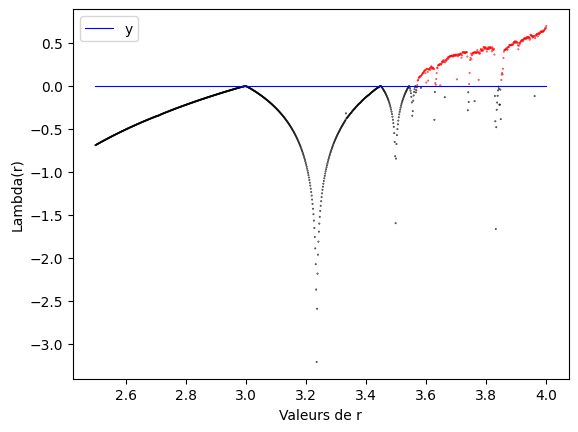

In [5]:
# Définition des constantes pour le calcul de lambda

LR_min = 2.5
LR_max = 4
LN_R = 1000
LN_termes_suite = 1000
LX0 = 0.1


# Définition des fonctions pour le tracé de lambda(r)

def derivee_fonc_logistic(x, r):
    ''' renvoie la dérivée de la fonction logistique '''
    return r*(1-2*x)

def calculer_lambda_r(liste_termes_suite_r, r):
    ''' renvoie un scalaire (lambda) en fonction d'une valeur de r et des termes de la suite'''
    xi_r = liste_termes_suite_r
    nb_termes = len(xi_r)
    lambda_r = 0
    if nb_termes != 0:
      termes_lambda = [ np.log(np.abs(derivee_fonc_logistic(xi_r[i], r))) for i in range(nb_termes) ]
      somme_termes_lambda = np.sum(termes_lambda)
      lambda_r = somme_termes_lambda/nb_termes
    return lambda_r


def calculer_les_lambda(lx0=LX0, ln_r=LN_R, ln_ts=LN_termes_suite, r_min=LR_min, r_max=LR_max):
    ''' renvoie la liste des valeurs de lambda et la liste des valeurs de r'''
    liste_r = np.linspace(r_min, r_max, ln_r)
    liste_lambda_r = []
    for i in range(len(liste_r)):
      liste_termes_suite_r = termes_suite_logistic(lx0, ln_ts, liste_r[i])
      lambda_r = calculer_lambda_r(liste_termes_suite_r, liste_r[i])
      liste_lambda_r.append(lambda_r)
    return liste_r, liste_lambda_r


def tracer_lambda_r(liste_r, liste_lambda):
    ''' trace le graphique lambda en fonction de r'''
    array_lambda = np.array(liste_lambda)
    array_r = np.array(liste_r)
    plt.plot([2.5, 4], [0, 0], 'b', linewidth=0.8)
    plt.legend('y=0')
    colors = np.where(array_lambda > 0, 'red', 'black')
    plt.scatter(array_r, array_lambda, c=colors, marker='.', s=0.5)
    plt.xlabel('Valeurs de r')
    plt.ylabel('Lambda(r)')
    plt.show()


# Tracé du graphique

listeR, listeL = calculer_les_lambda()
tracer_lambda_r(listeR, listeL)







En comparant le diagramme de bifurcation et le graphique représentant lambda(r), on constate que pour des valeurs de r inférieures à environ 3.6, la distance entre 2 limites converges. En effet, pour un lambda négatif, l'exponetielle va converger. Et on lit sur le diagramme de bifurcation un nombre faible de limites (1, 2, 4). Sur l'intervalle [2.5, 3.6[, l'équation logistique est donc stable. En dehors de cette intervalle, on observe un comportement chaotique dans les représentations graphiques.

